In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

VERSIONS = [
    ('best', 'current production'),
    ('2021_02_16.02', 'cascade test lambda=2'),
    ('2021_02_16.03', 'cascade test lambda=10'),
    ('2021_02_16.07', 'cascade test lambda=1000'),
]


In [2]:
hierarchy = pd.read_csv('/ihme/covid-19/model-inputs/best/locations/modeling_hierarchy.csv')
hierarchy = hierarchy.loc[hierarchy['most_detailed'] == 1]

def load_idr(version: str):
    pred_idr = pd.read_csv(f'/ihme/covid-19/infection-detection-rate/{version}/pred_idr.csv')
    pred_idr['date'] = pd.to_datetime(pred_idr['date'])
    pred_idr = pred_idr.loc[pred_idr['date'] >= pd.to_datetime('2020-03-01')]
    pred_idr = pred_idr.loc[pred_idr['date'] <= pd.to_datetime('2021-03-01')]
    pred_idr = (pred_idr
                .set_index(['location_id', 'date'])
                .loc[:, 'idr']
                .rename('pred_idr'))

    obs_idr = pd.read_csv(f'/ihme/covid-19/infection-detection-rate/{version}/idr_plot_data.csv')
    obs_idr = obs_idr.loc[obs_idr['is_outlier'] == 0]
    obs_idr['date'] = pd.to_datetime(obs_idr['date'])
    obs_idr = (obs_idr
               .set_index(['location_id', 'date'])
               .loc[:, 'idr']
               .rename('obs_idr'))

    return pred_idr, obs_idr

idr_data = {version_label:load_idr(version) for version, version_label in VERSIONS}

obs_data = pd.read_csv(f'/ihme/covid-19/infection-detection-rate/best/idr_plot_data.csv')
obs_data = obs_data.loc[obs_data['is_outlier'] == 0]
model_location_ids = (obs_data
                      .loc[:, 'location_id']
                      .unique()
                      .tolist())
hierarchy = hierarchy.loc[hierarchy['location_id'].isin(model_location_ids)]


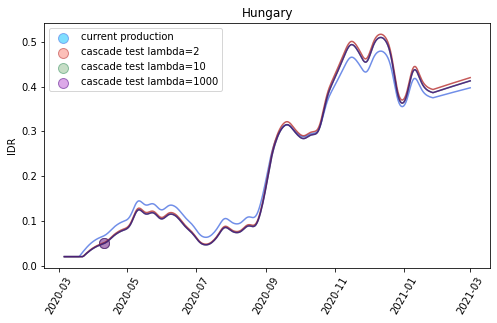

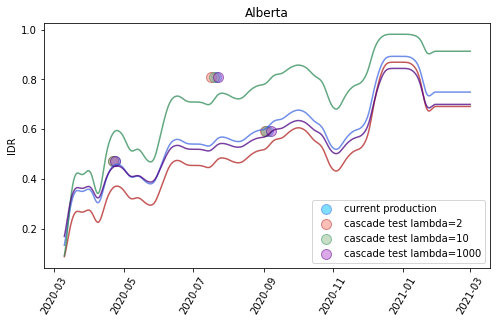

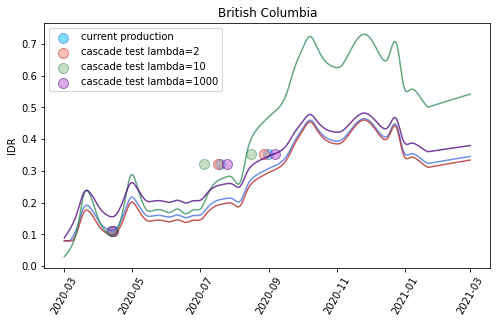

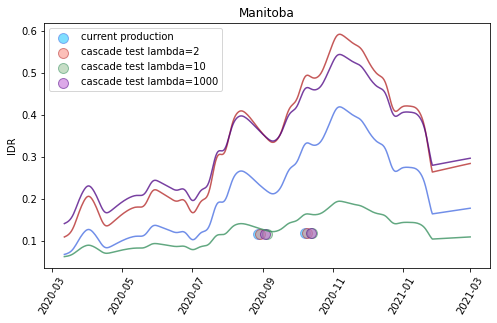

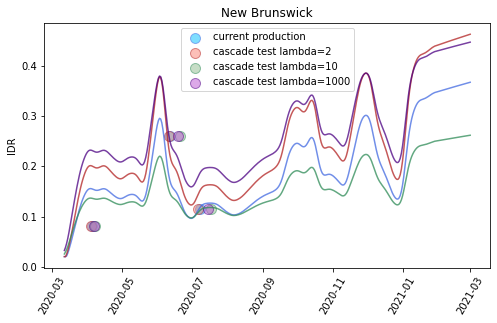

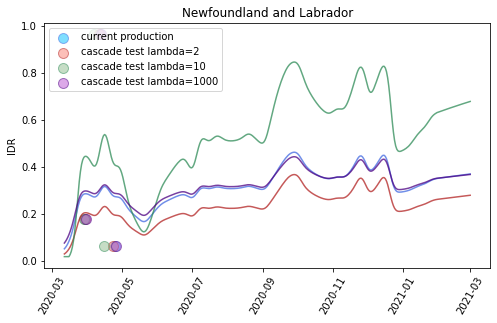

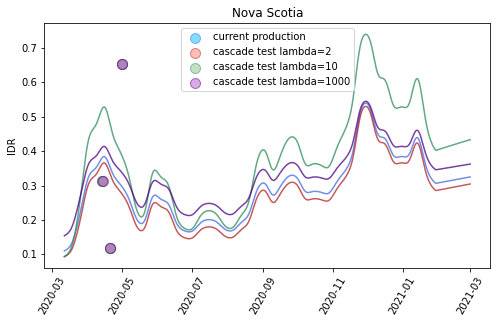

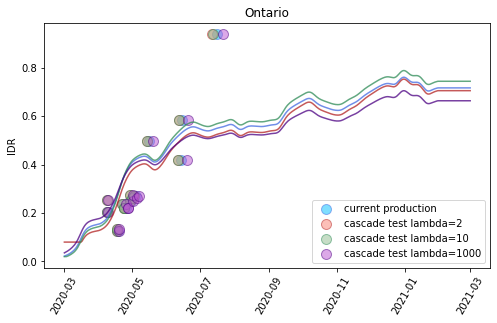

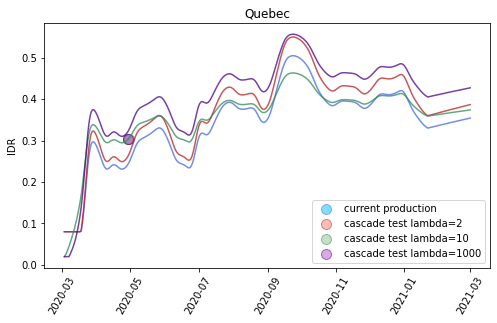

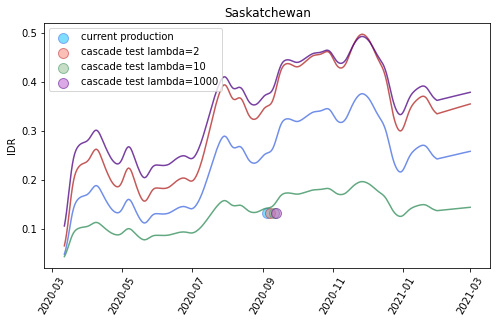

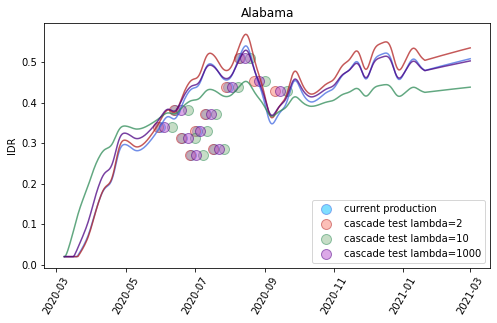

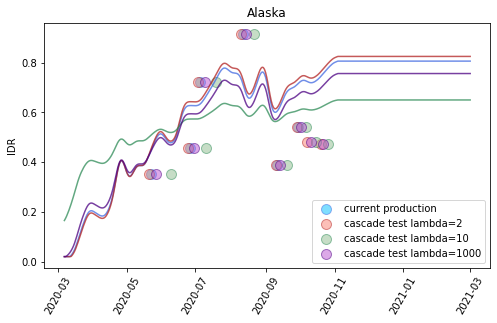

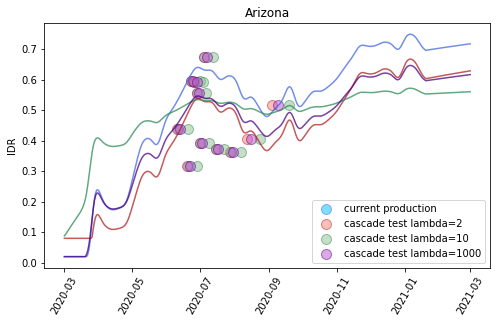

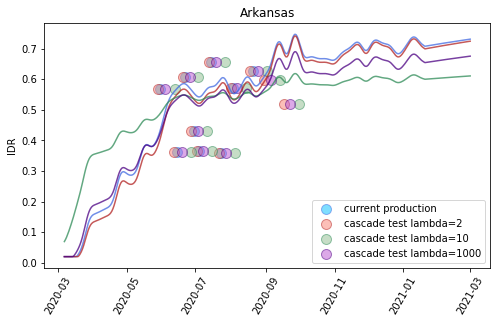

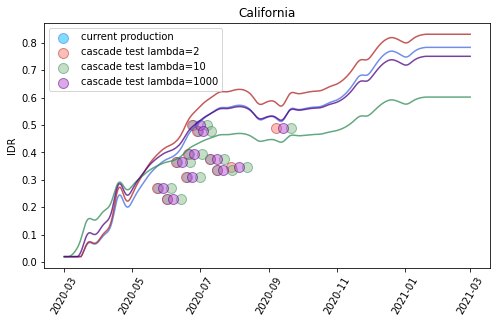

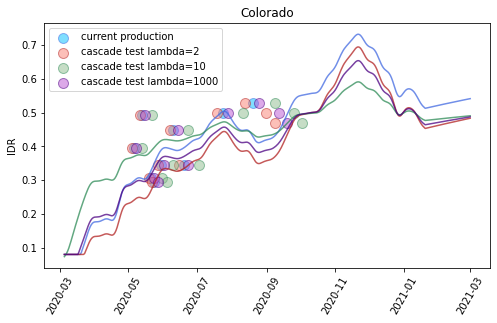

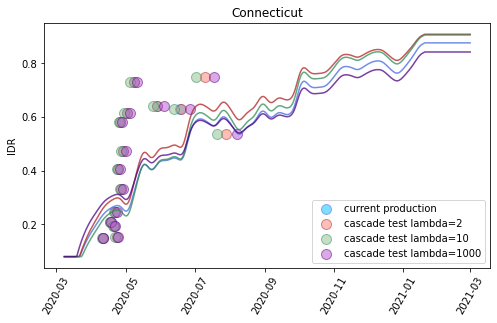

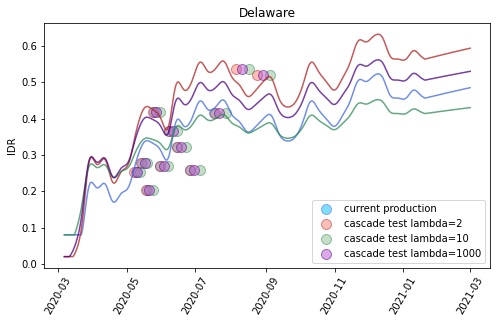

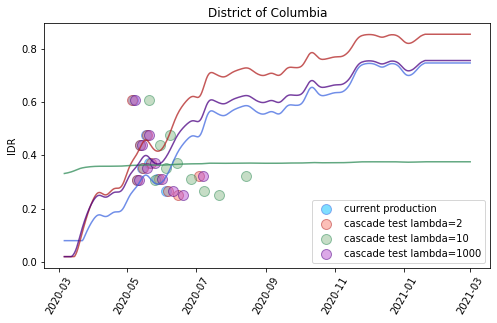

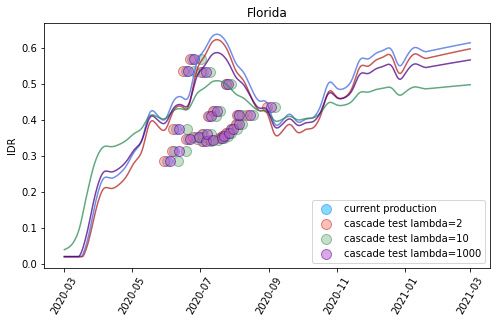

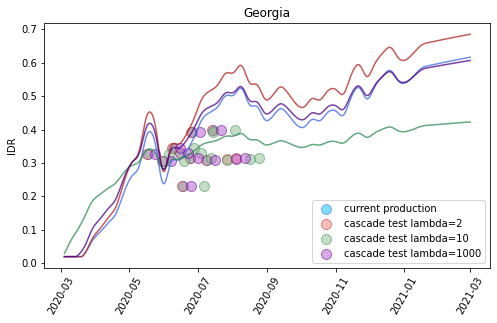

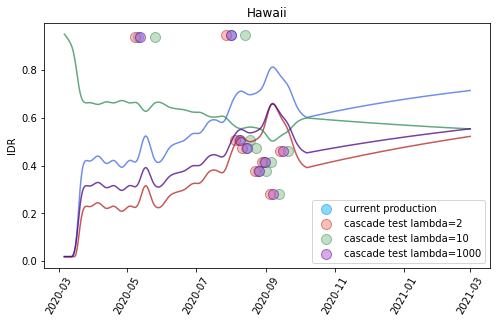

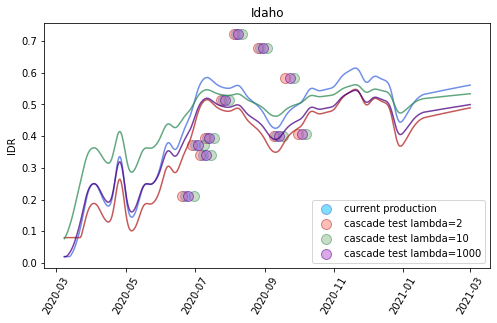

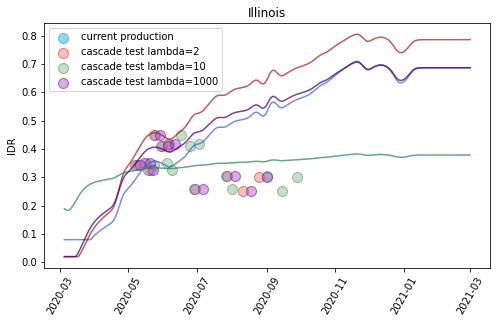

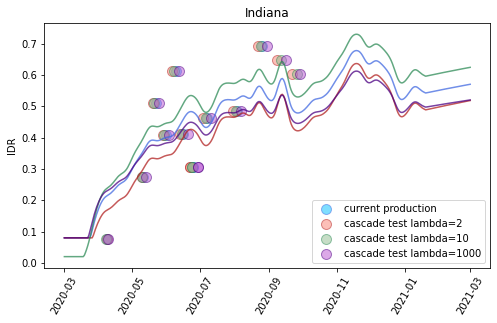

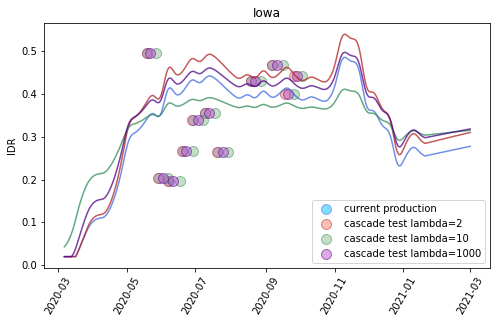

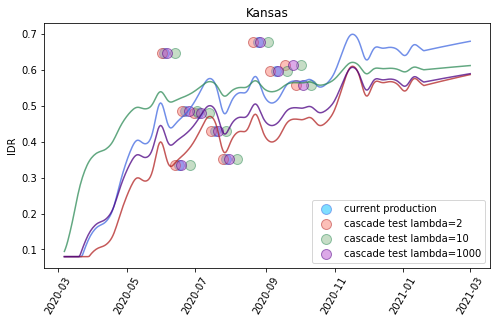

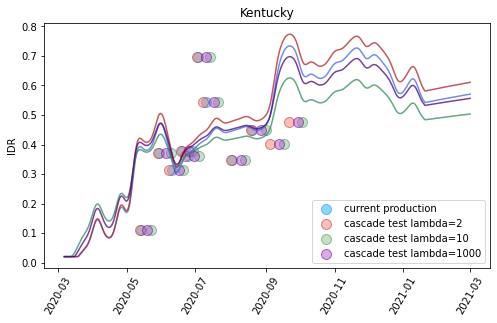

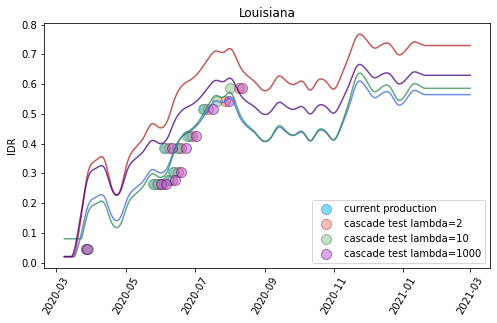

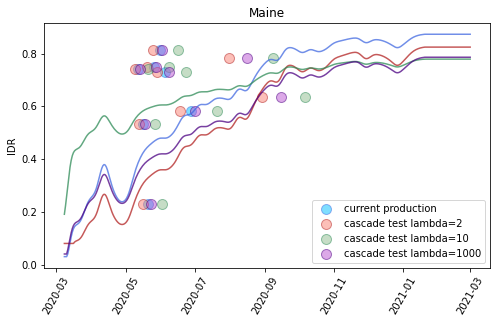

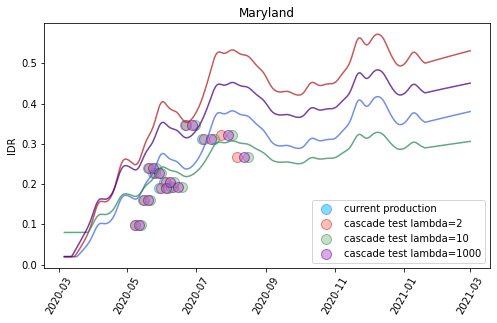

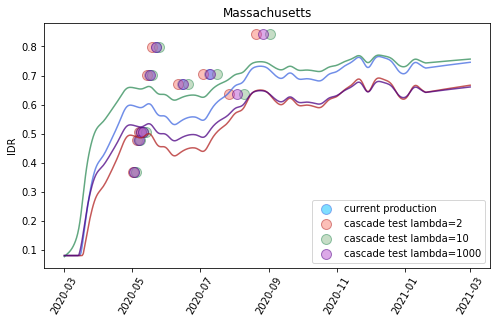

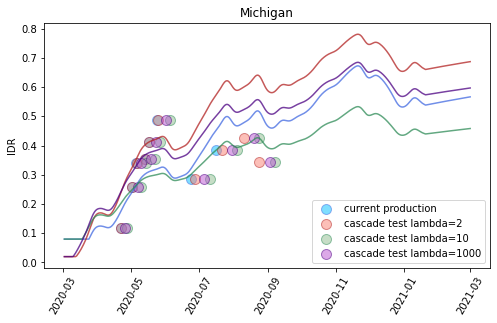

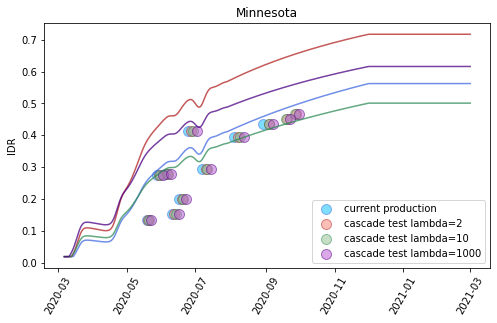

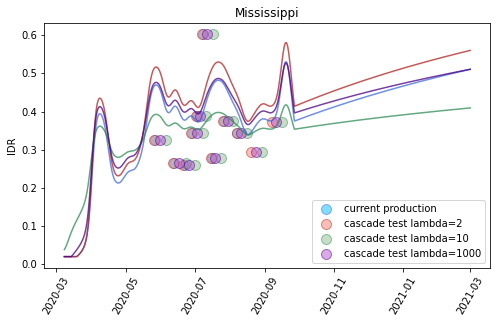

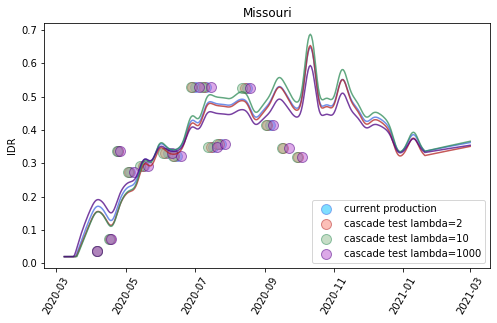

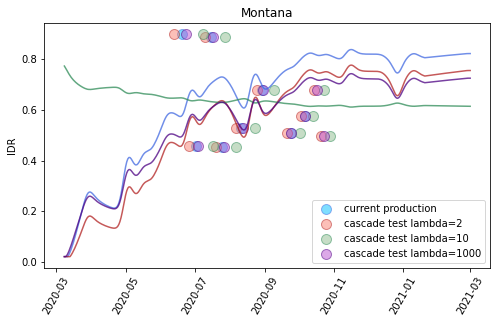

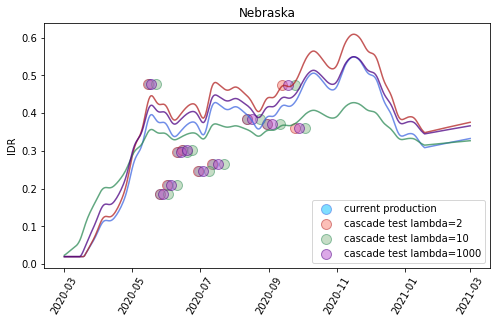

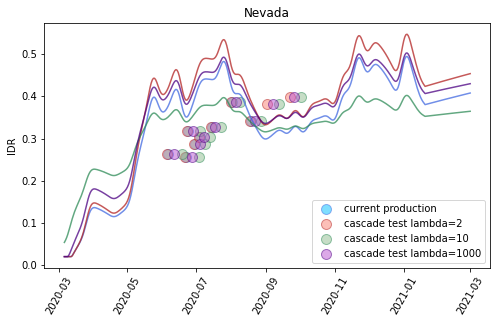

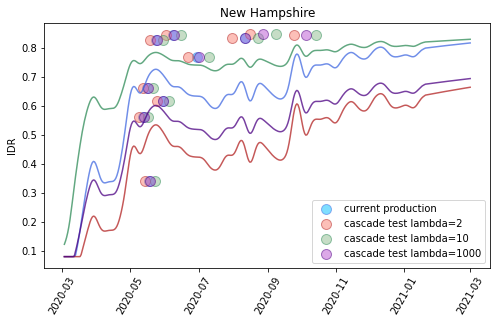

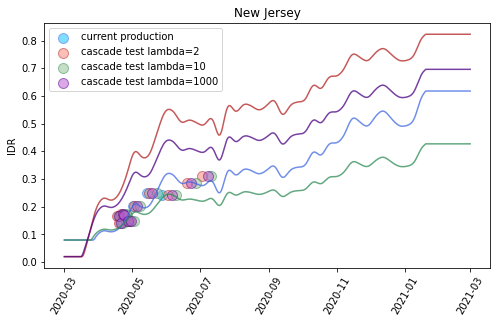

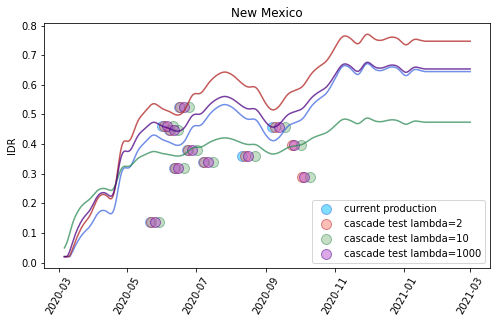

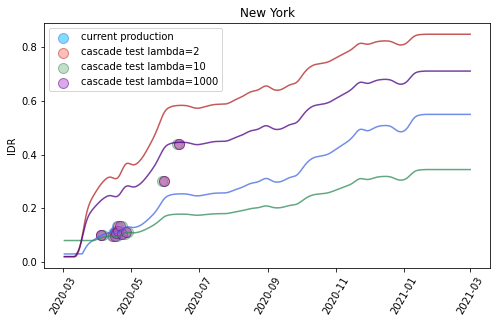

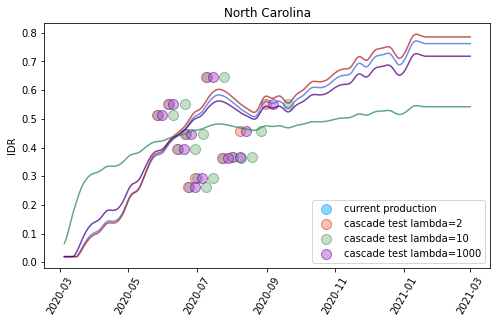

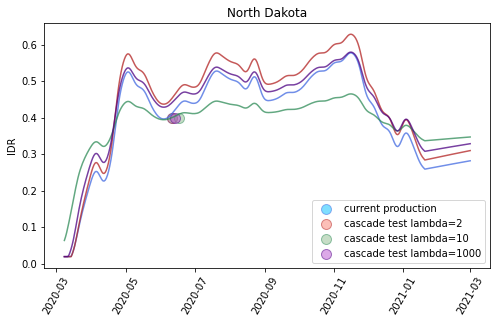

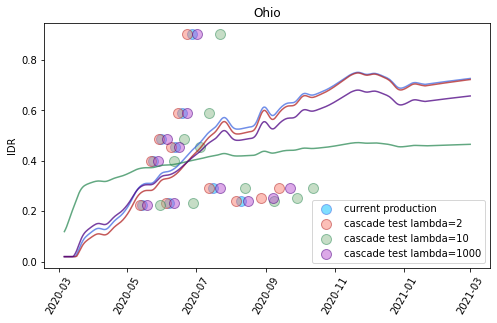

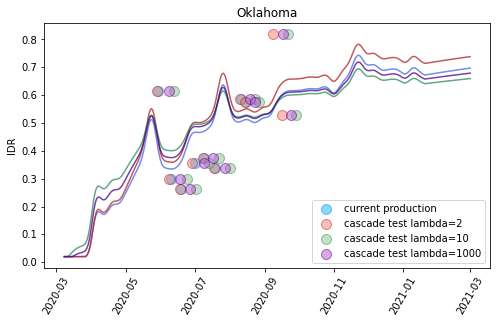

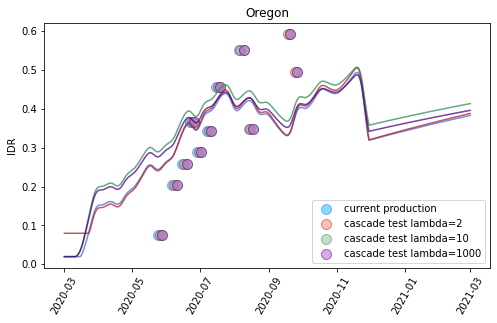

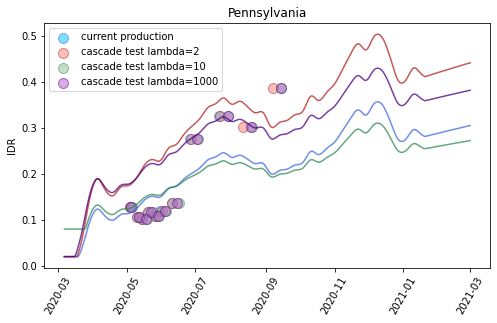

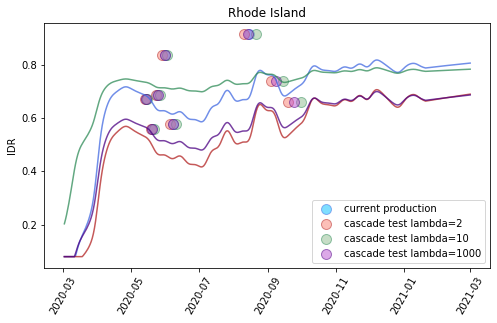

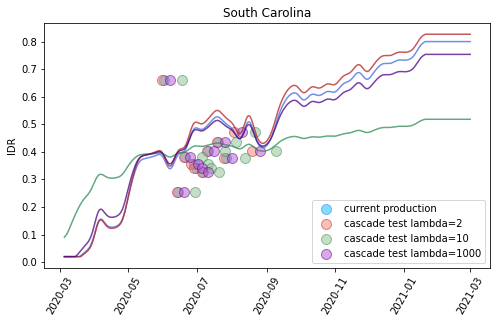

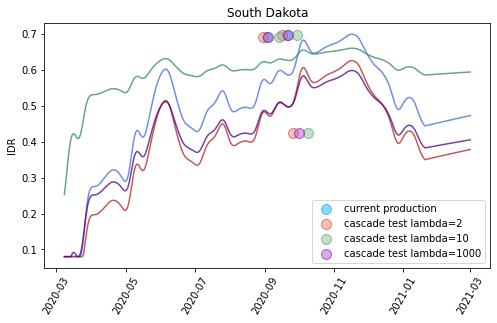

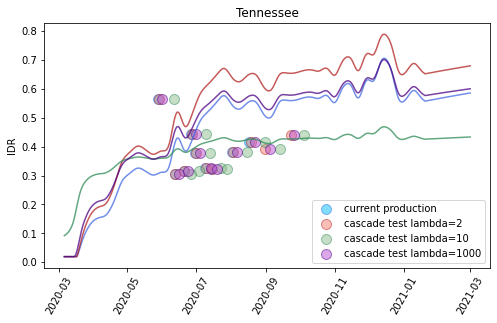

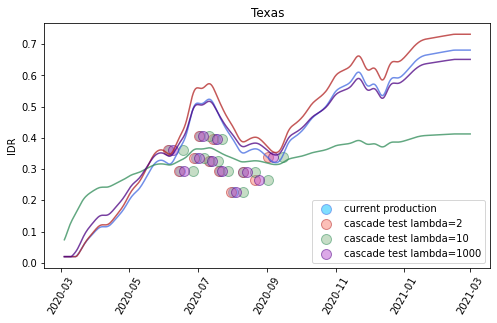

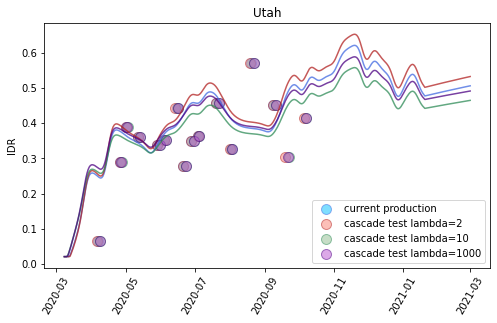

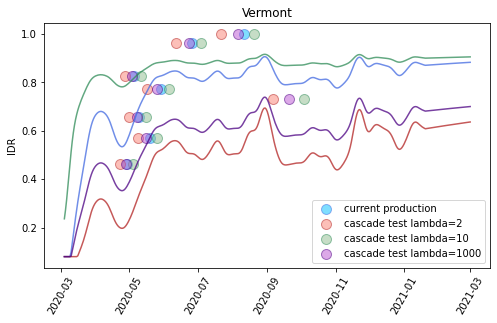

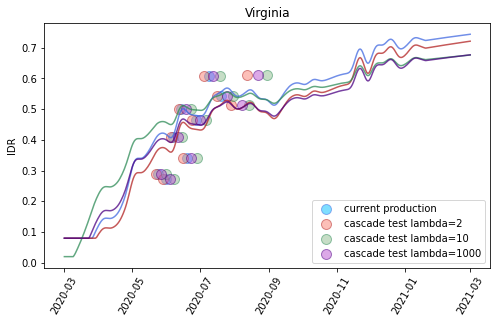

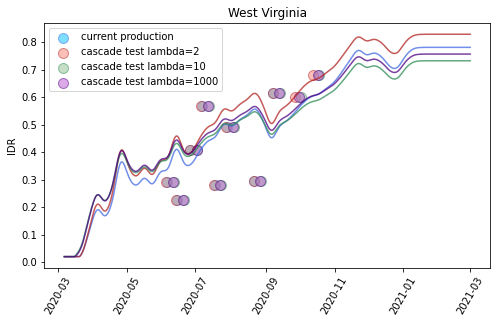

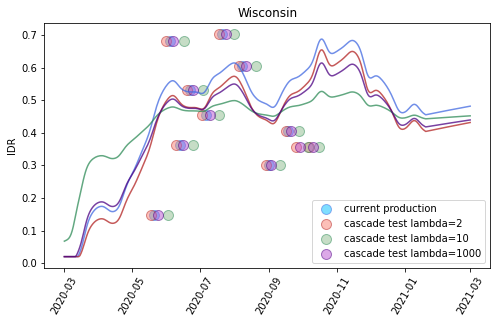

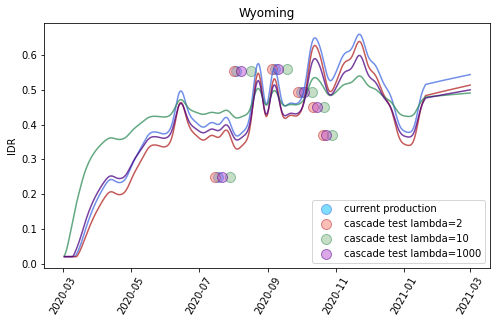

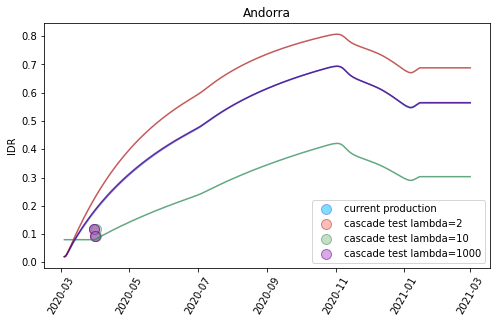

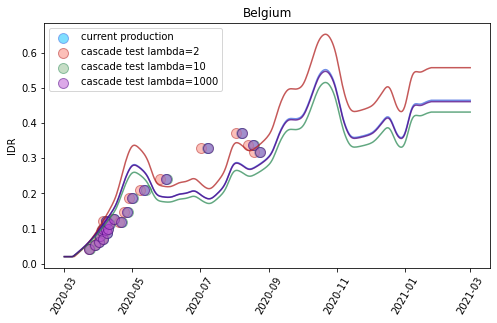

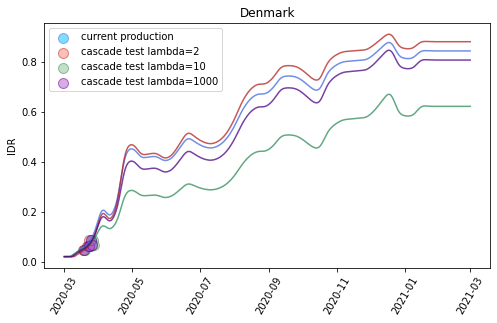

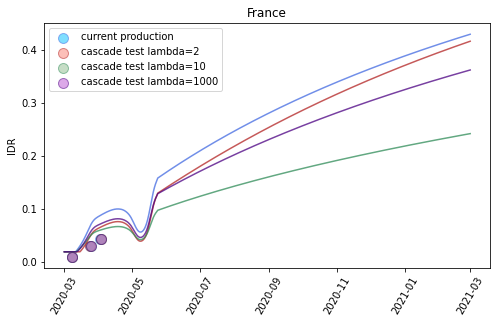

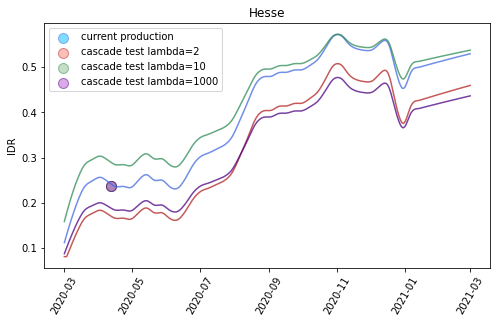

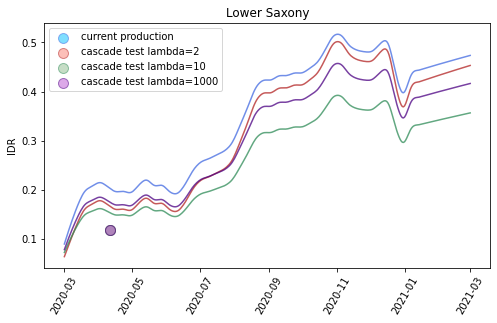

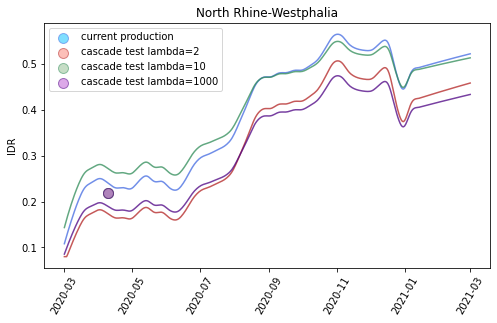

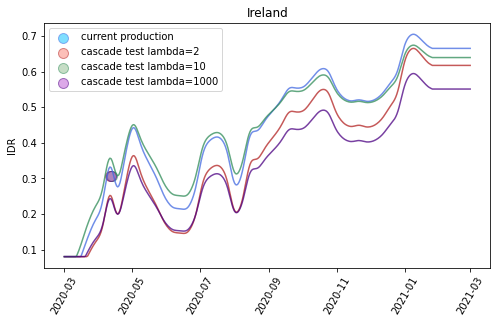

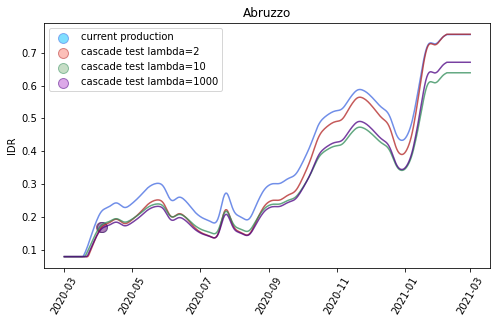

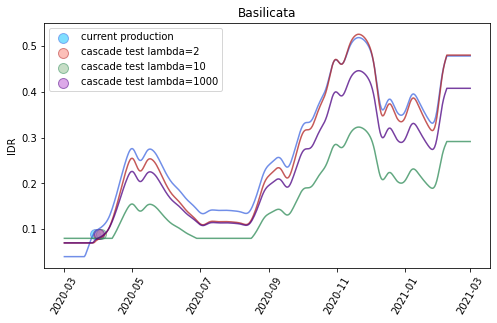

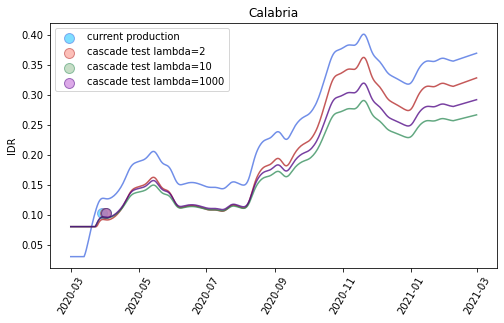

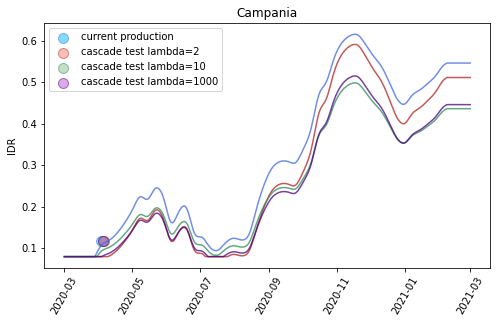

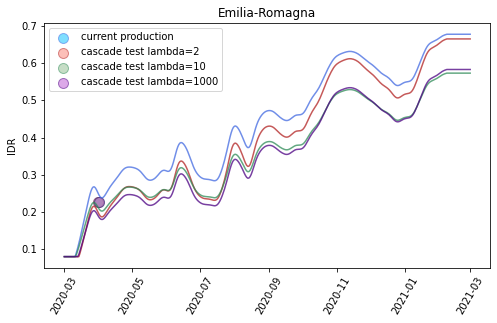

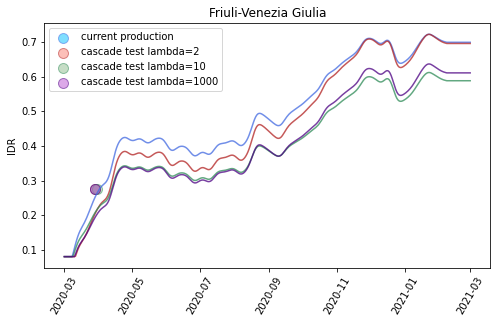

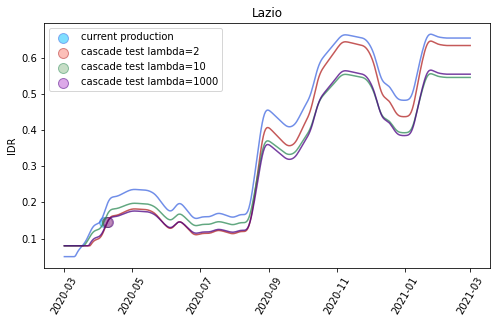

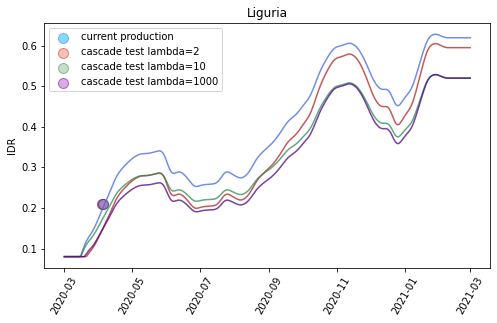

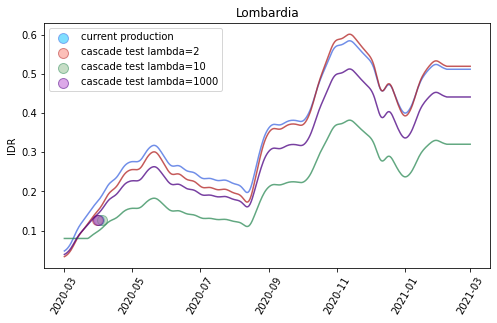

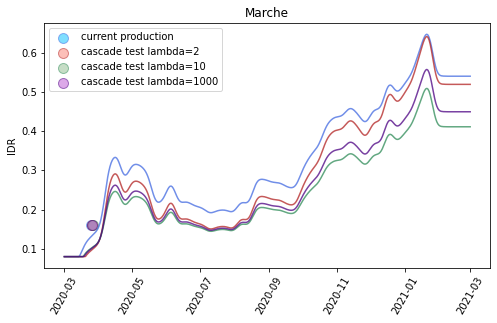

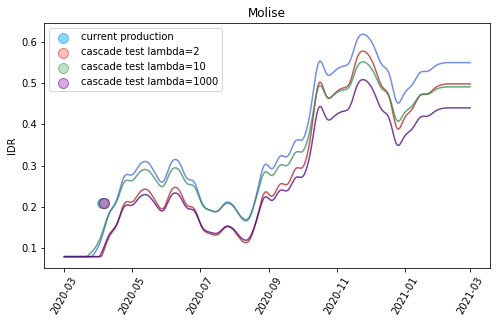

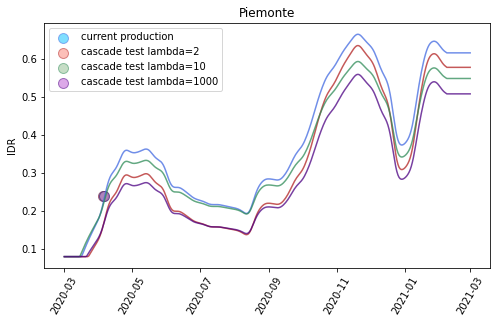

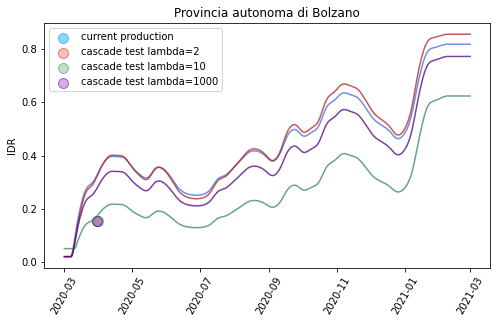

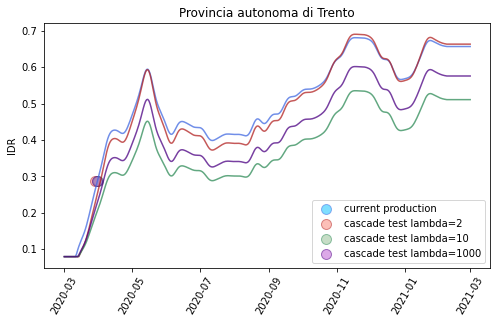

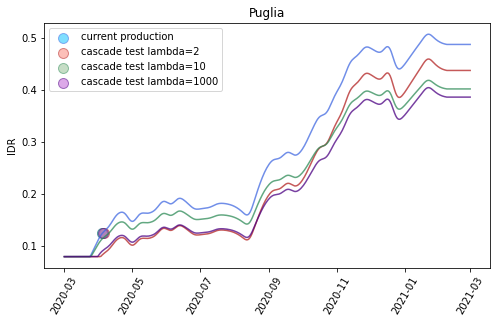

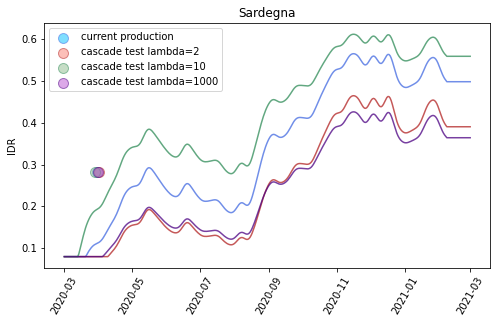

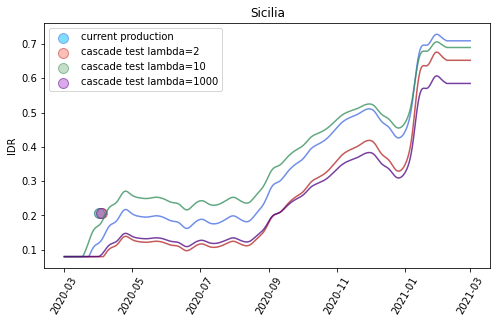

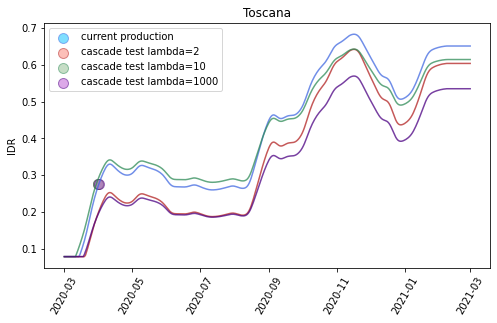

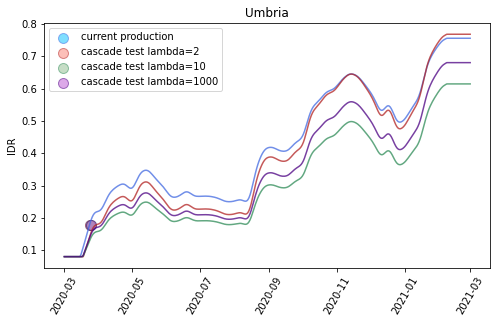

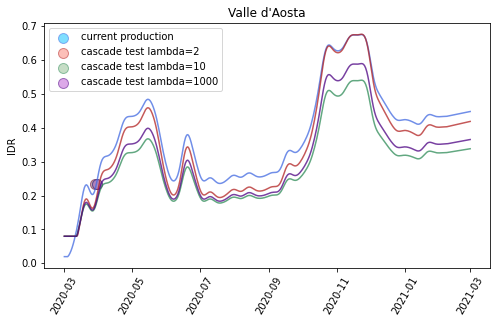

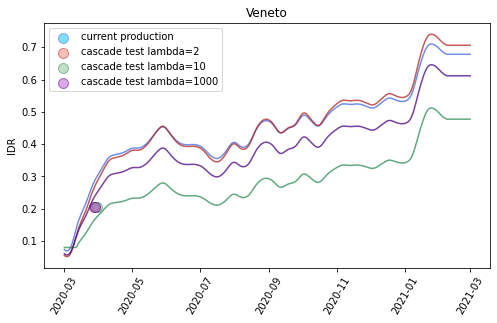

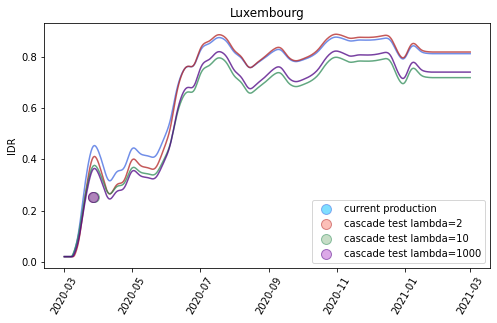

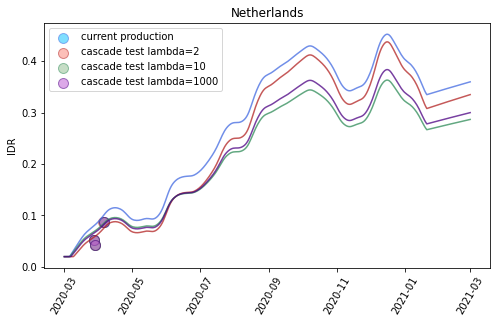

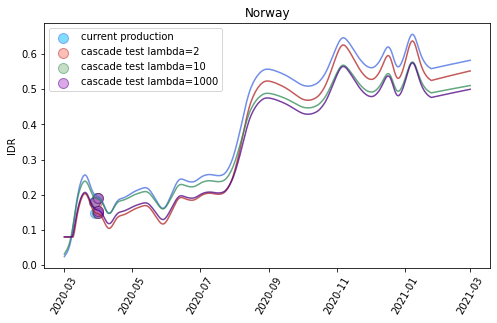

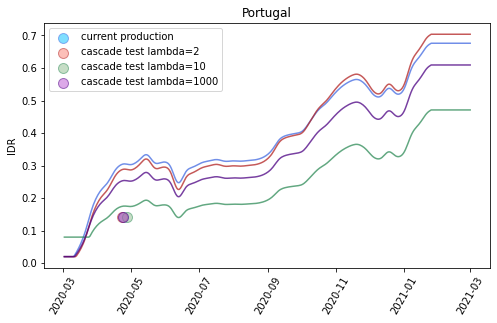

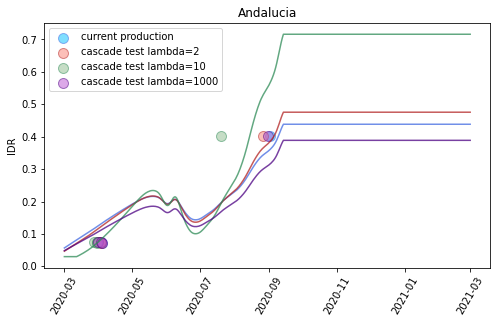

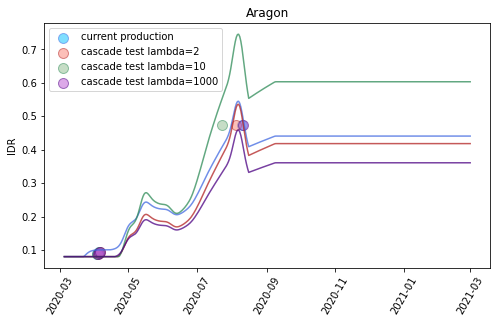

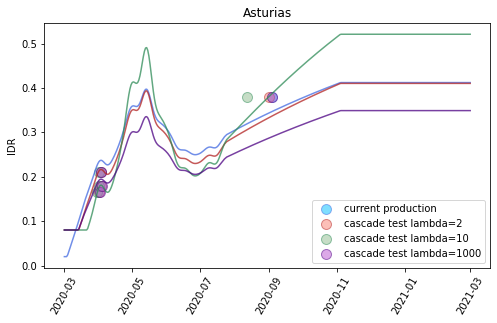

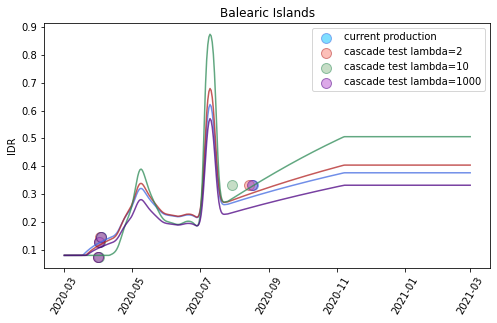

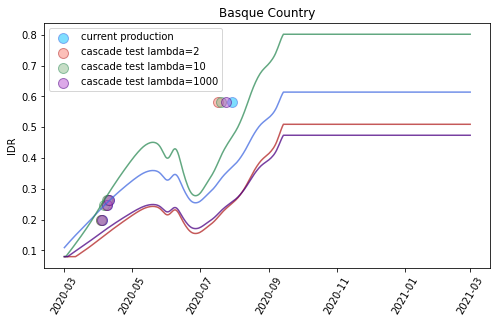

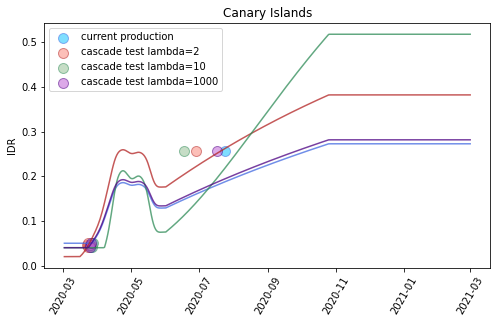

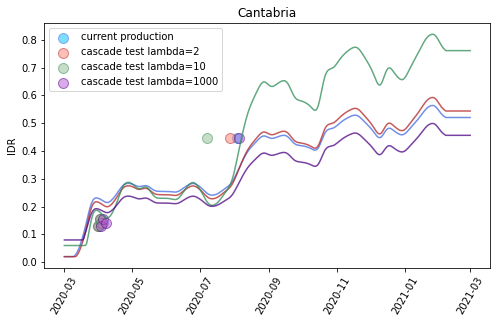

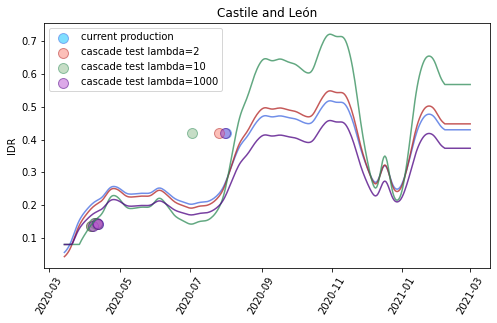

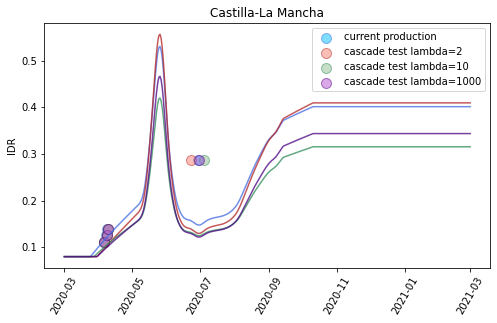

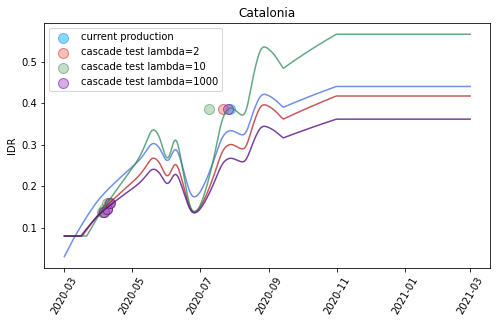

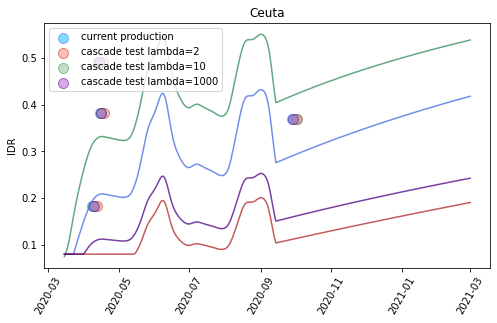

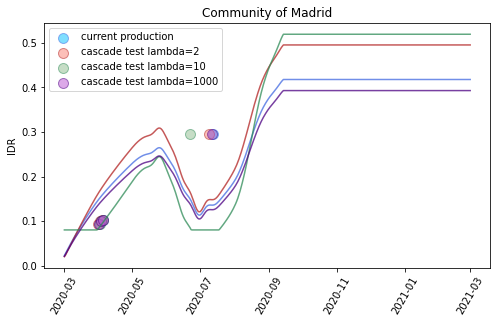

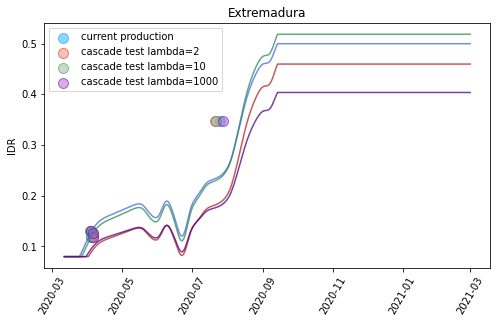

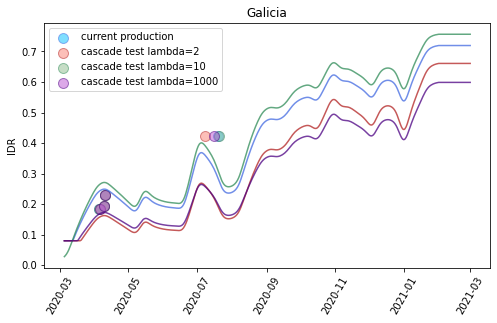

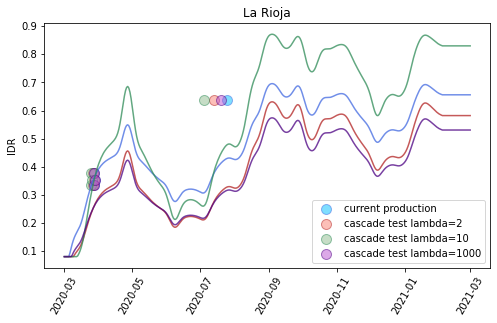

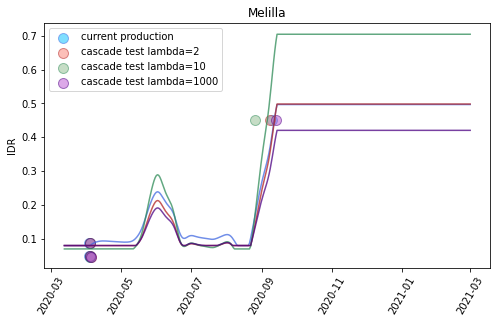

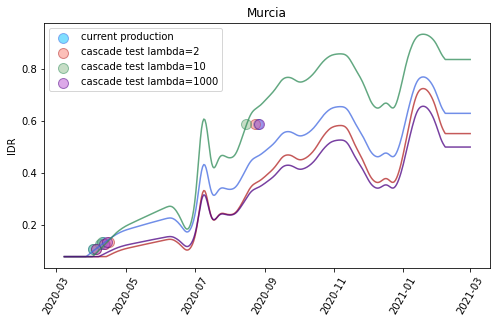

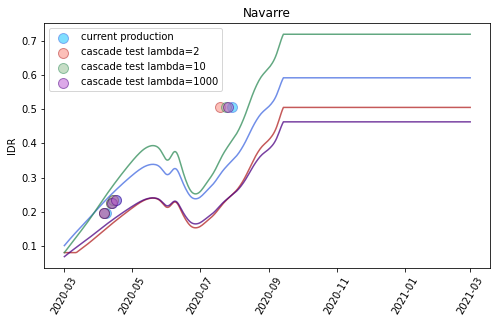

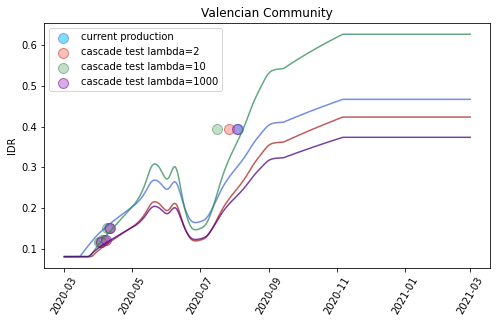

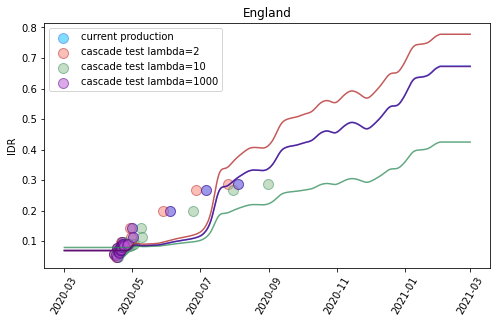

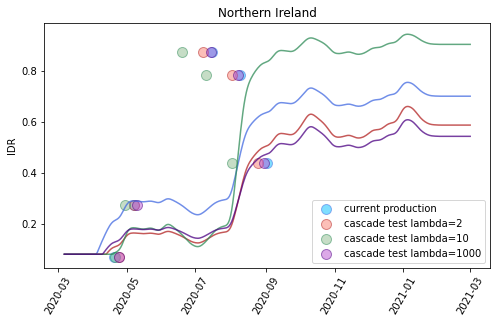

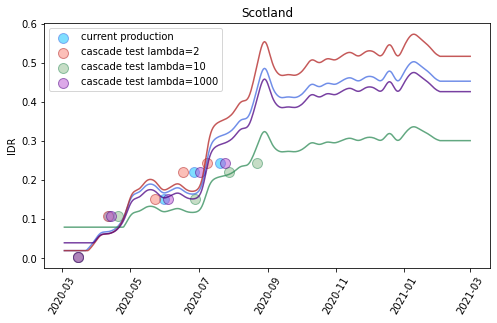

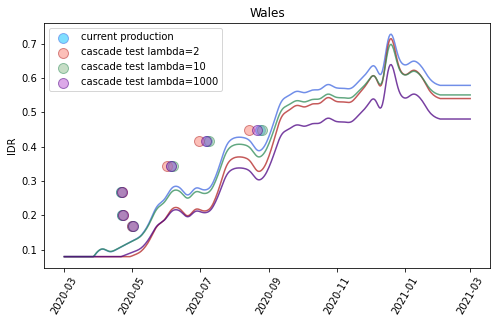

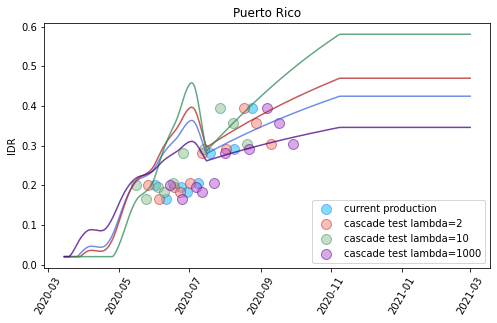

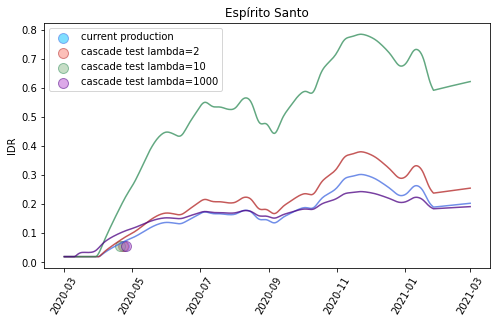

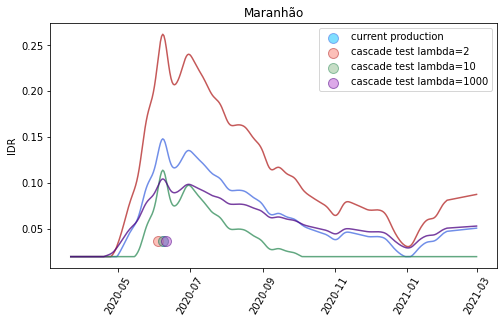

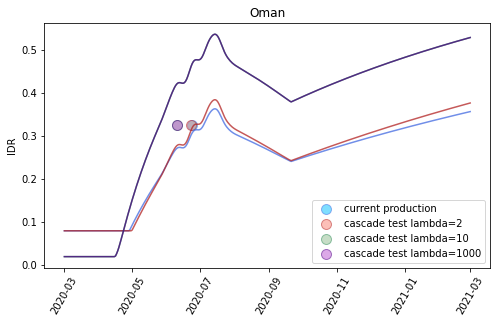

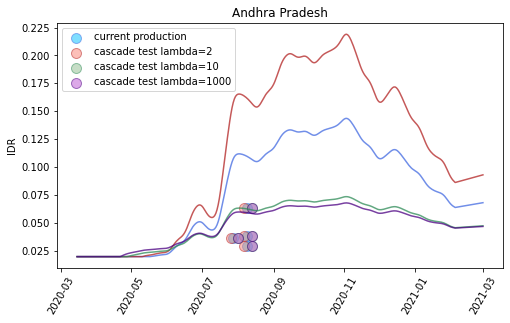

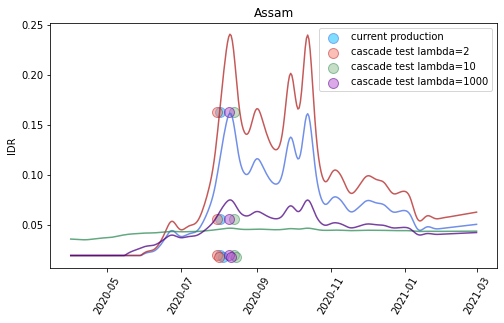

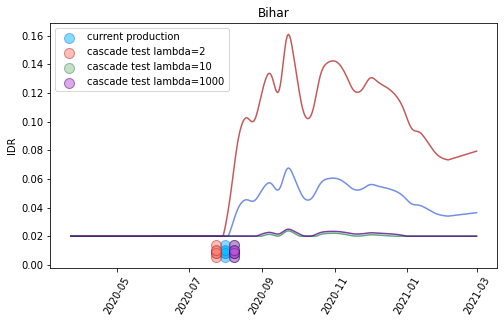

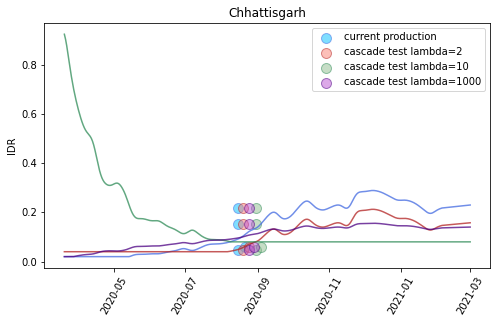

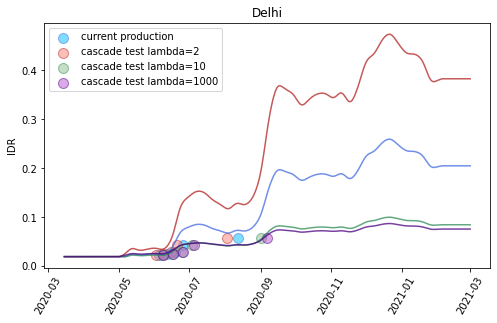

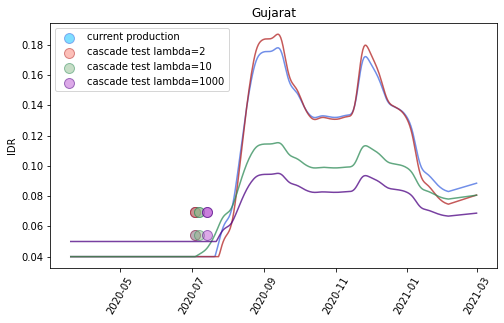

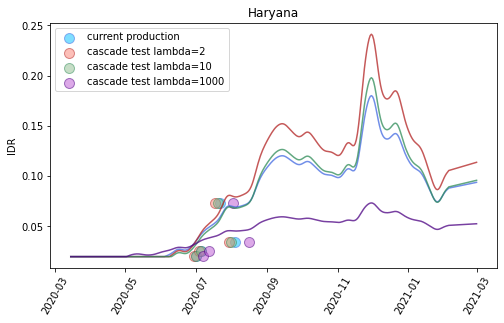

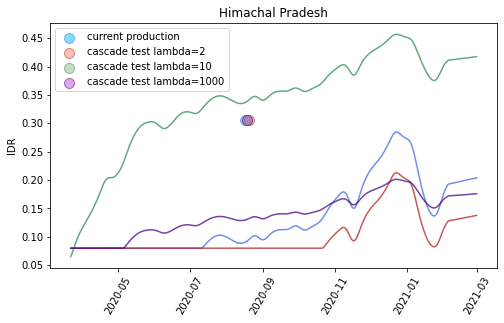

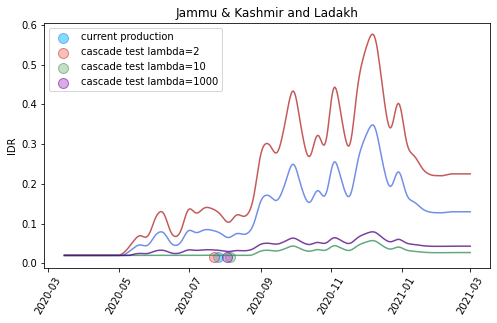

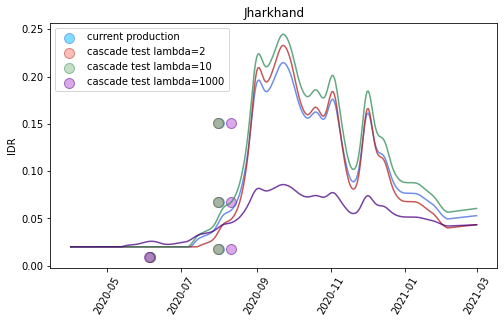

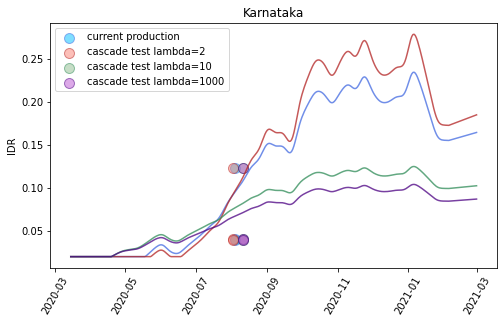

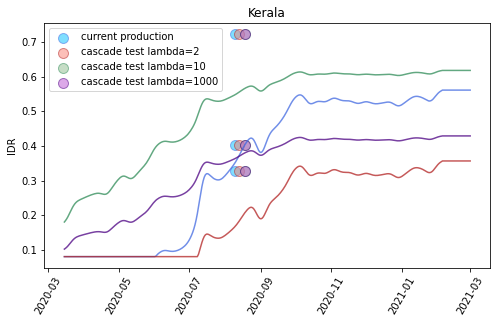

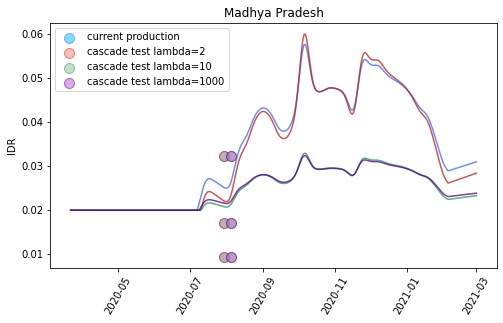

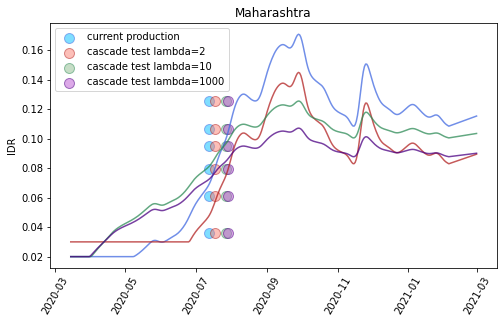

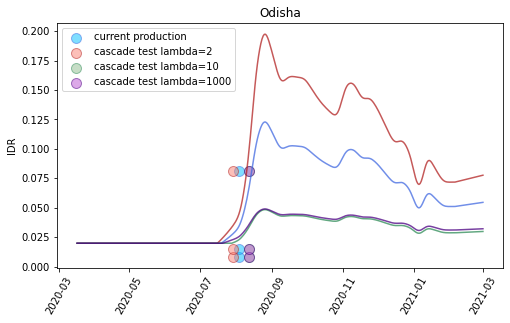

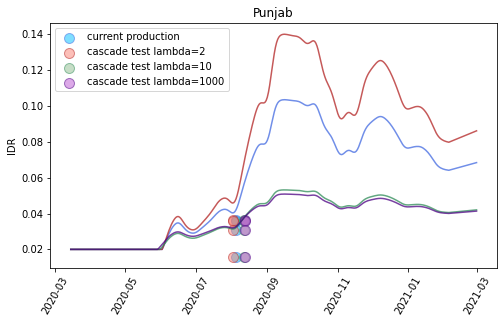

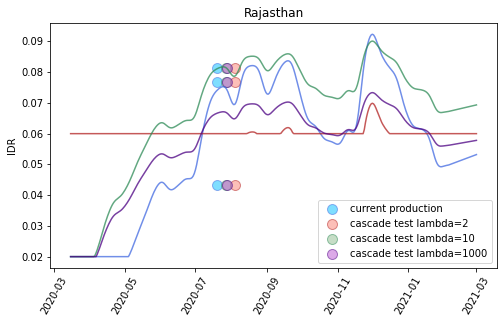

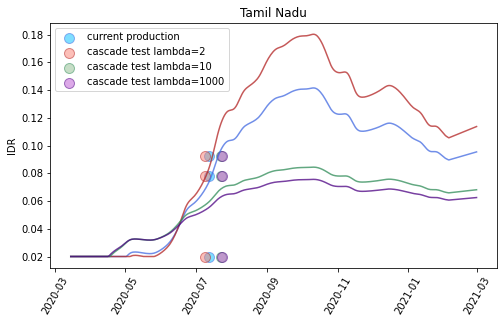

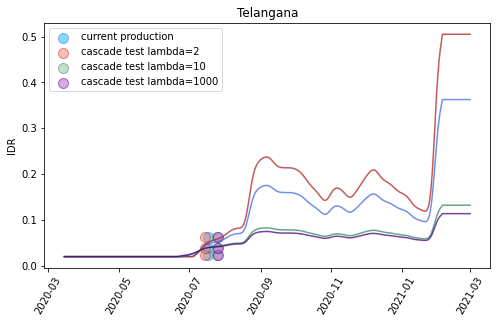

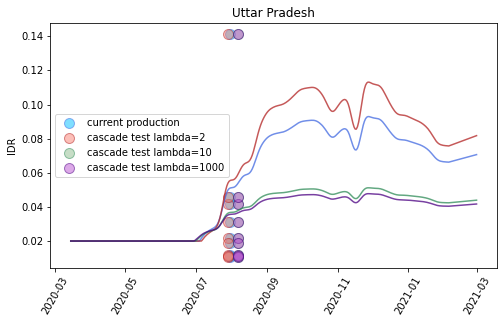

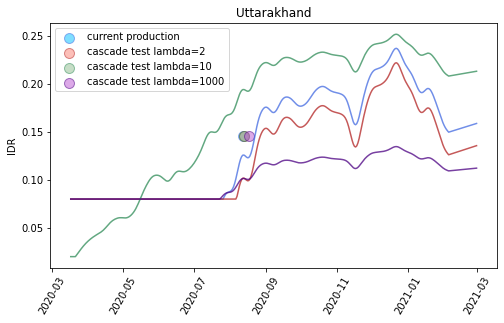

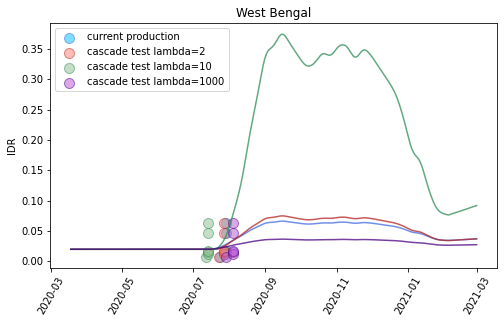

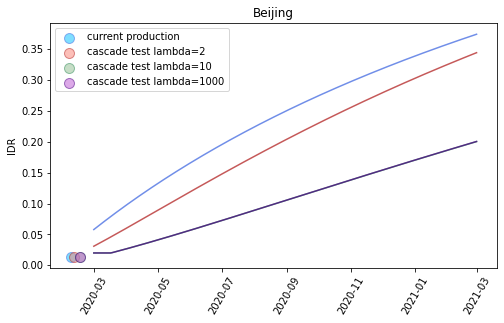

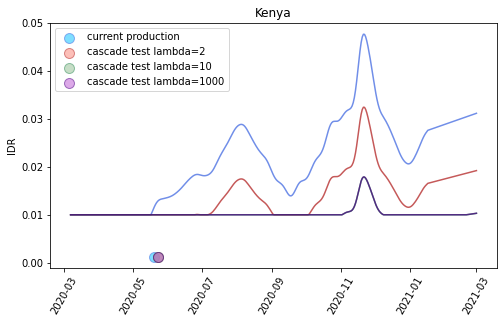

In [4]:
colors = [('deepskyblue', 'royalblue'),
          ('salmon', 'firebrick'),
          ('darkseagreen', 'seagreen'),
          ('mediumorchid', 'indigo'),]
for location_id, location_name in zip(hierarchy['location_id'], hierarchy['location_name']):
    plt.figure(figsize=(8, 4.5))
    for i, (version_label, (pred_idr, obs_idr)) in enumerate(idr_data.items()):
        lightcol, darkcol = colors[i]
        plt.plot(pred_idr[location_id],
                 color=darkcol, alpha=0.75)
        plt.scatter(obs_idr[location_id].index,
                    obs_idr[location_id].values,
                    label=version_label, alpha=0.5,
                    s=100, c=lightcol, edgecolors=darkcol)
        
    plt.ylabel('IDR')
    plt.xticks(rotation=60)
    plt.legend()
    plt.title(location_name)
    plt.show()

In [ ]:
for version_label, (pred_idr, obs_idr) in idr_data.items():
    resid = (obs_idr - pred_idr).dropna()
    rmse = np.sqrt(np.mean(resid ** 2))
    print(f'{version_label} RMSE: {rmse}')


In [6]:
sdi = pd.read_csv('/ihme/centralcomp/epi_transition/gbd_2019/sdi/12/sdi_quintiles.csv')
sdi.loc[sdi['location_id'] == 102]

sdi_version_id  location_id  parent_id sdi_quintile
1011              12          102      44634     High SDI